In [1]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
results = joblib.load('../../../5_evaluation/large/results.sav')['real']

No-Effect vs. Effect


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


No-Effect vs. Cyto


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Cyto vs. Effect


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


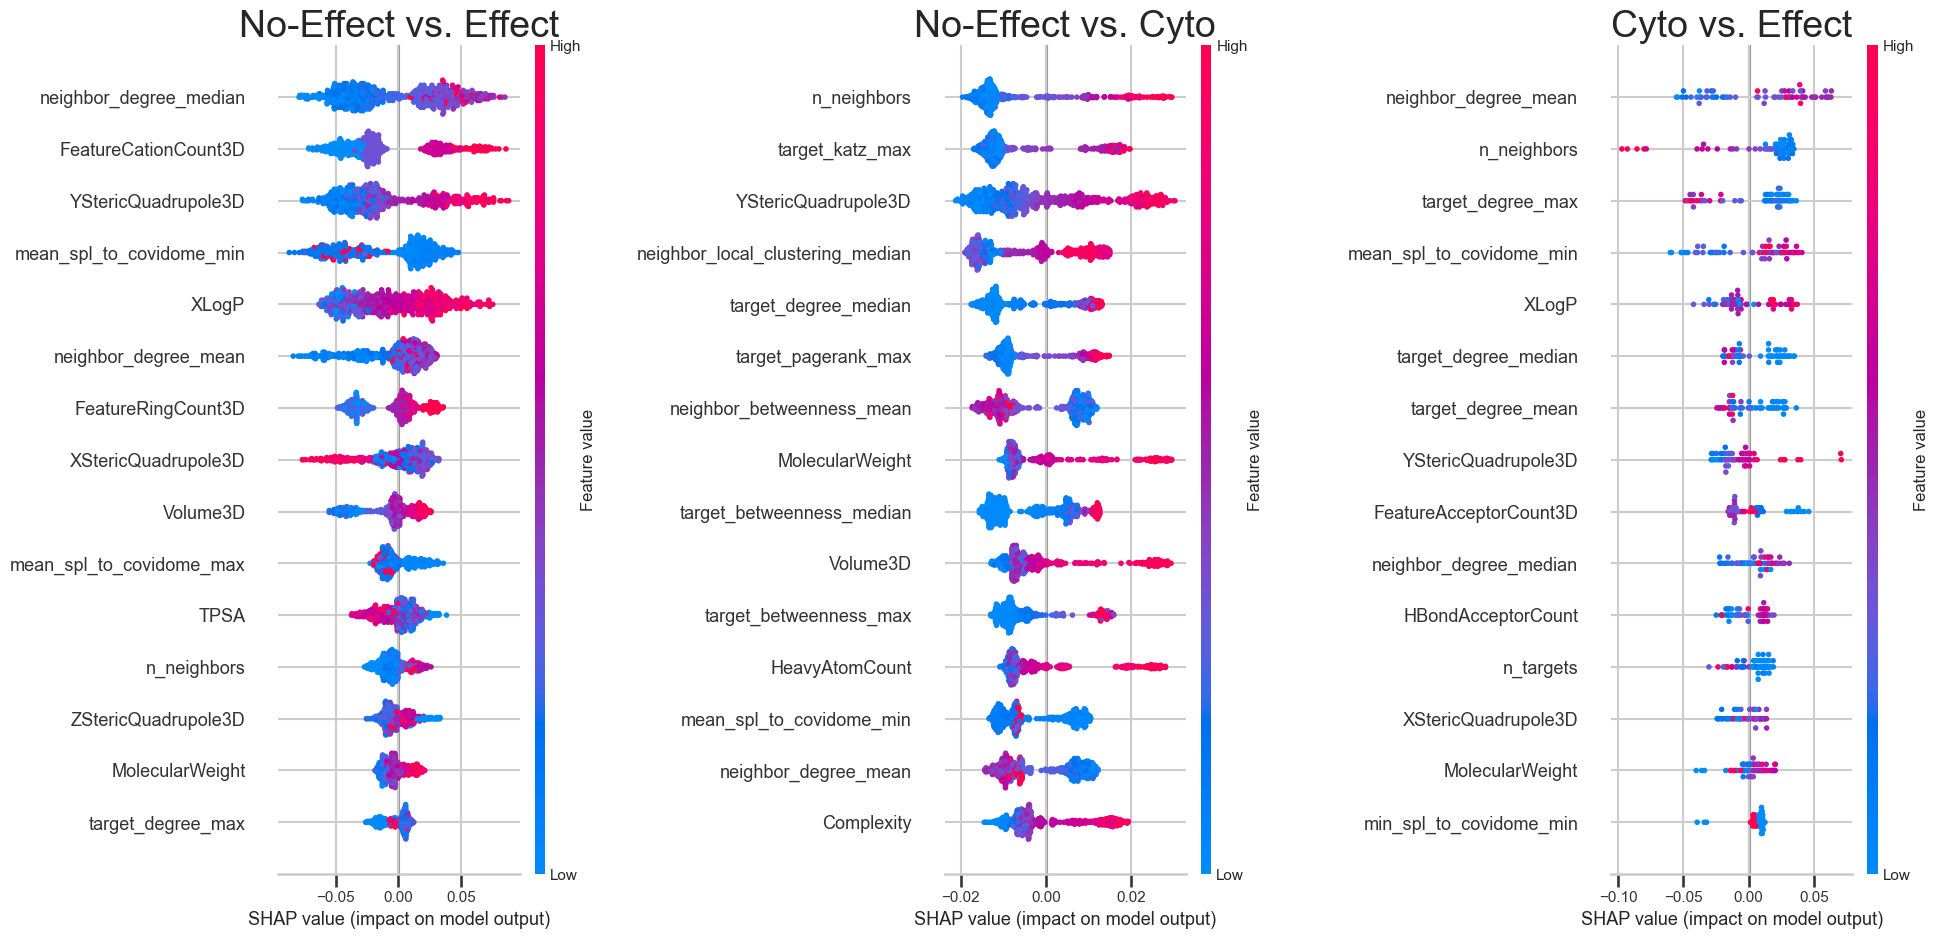

In [5]:
sns.set("talk", font_scale=1.5)
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 10), dpi=100)
i = 0
for key in results.keys():
    print(key)
    labels = key.split(' vs. ')
    model = results[key]['model']
    X = results[key]['X_test']
    rf = model['clf']
    var_thresh: VarianceThreshold = model['var_thresh']
    scaler = model['scaler']
    imputer = model['imputer']
    X_var = var_thresh.transform(X)
    X_scale = scaler.transform(X_var)
    X_impute = imputer.transform(X_scale)
    X = pd.DataFrame(data=X_impute, index=X.index, columns=var_thresh.get_feature_names_out(input_features=X.columns))
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X)
    plt.sca(axes[i])
    axes[i].set(title=f'{labels[0]} vs. {labels[1]}')
    shap.summary_plot(shap_values[1], X, show=False, max_display=15, plot_size=None, class_names=labels)

    plt.tight_layout()
    
    i += 1

fig.savefig('shap_single.png', format="png", dpi=300)
fig.savefig('shap_single.pdf', format="pdf", dpi=300)